# step 1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# step 2: Load the data 

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/edyoda/DS31032023/main/Machine%20Learning/August/26-8-2023/Assignment/Marketing.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
data.shape

(4572, 5)

### Observations
- TV, Radio, Social Media and Influencer are independent variables and sales is dependent on these independent variables.
- Sales is the target variable in the above data.

# step 3: data cleaning, data wrangling, data preprocessing

## Missing Value Treatment

In [4]:
# checking for missing values

data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [5]:
# Percentage of missing values

data.isnull().sum()/len(data)*100

TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64

## Missing value treatment

### Numerical columns TV,Radio,Social Media,Sales  - median imputation.

In [6]:
data['TV'] = data['TV'].fillna(data['TV'].median())
data['Radio'] = data['Radio'].fillna(data['Radio'].median())
data['Social Media'] = data['Social Media'].fillna(data['Social Media'].median())
data['Sales'] = data['Sales'].fillna(data['Sales'].median())
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## Checking relation between dependent and independent columns.

<Axes: >

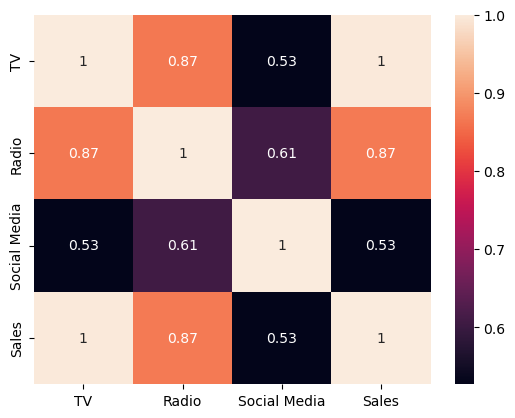

In [7]:
sns.heatmap(data.corr(),annot = True)

### Observations:
- TV(indep) and sales(dep) => 1
- radio(indep) and sales(dep) => 0.87
- Social media(indep) and sales(dep) => 0.53
- TV(indep) and socialmedia(indep) => 0.53 : multicolinearity
- TV(indep) and radio(indep) => 0.87: multicolinearity
- radio(indep) and socialmedia(indep) => 0.61 : multicolinearity
- Also the influencer column contains text data.We have to do feature scaling.

- Since the radio column is creating more than one multicolinearity drop the radio column for further analysis.
- Ignore other multicolinearity.

In [8]:
data = data.drop('Radio',axis =1)
data.head()

,TV,Social Media,Influencer,Sales
0,16.0,2.907983,Mega,54.732757
1,13.0,2.409567,Mega,46.677897
2,41.0,2.913410,Mega,150.177829
3,83.0,6.922304,Mega,298.246340
4,15.0,1.405998,Micro,56.594181


<Axes: >

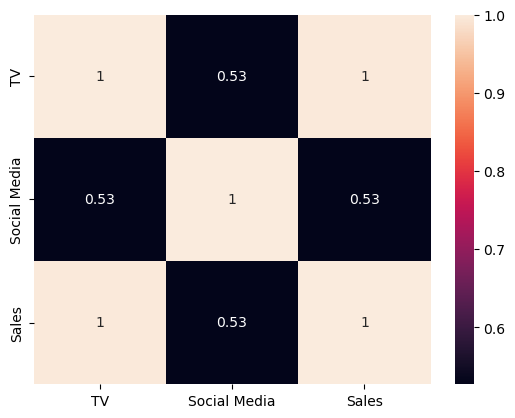

In [9]:
sns.heatmap(data.corr(),annot = True)

##  Feature scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [11]:
data[['TV','Social Media','Sales']] = mms.fit_transform(data[['TV','Social Media','Sales']])
data.head()

,TV,Social Media,Influencer,Sales
0,0.066667,0.207984,Mega,0.070696
1,0.033333,0.172336,Mega,0.046499
2,0.344444,0.208372,Mega,0.357421
3,0.811111,0.495098,Mega,0.802231
4,0.055556,0.100558,Micro,0.076288


## feature encoding

In [12]:
data['Influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [13]:
dic = {'Nano':0,'Micro':1,'Macro':2,'Mega':3}
data['Influencer'] = data['Influencer'].replace(dic)
data.head()

,TV,Social Media,Influencer,Sales
0,0.066667,0.207984,3,0.070696
1,0.033333,0.172336,3,0.046499
2,0.344444,0.208372,3,0.357421
3,0.811111,0.495098,3,0.802231
4,0.055556,0.100558,1,0.076288


# step 4: separate x and y

In [14]:
x = data.drop('Sales',axis=1)
y = data['Sales']

# step 5: split the data

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# step 6: Apply linear regression on the train set

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

# step 7: Perform predictions on test set

In [18]:
y_pred = lr.predict(x_test)
y_pred

array([0.38690229, 0.69632824, 0.80532514, 0.79742262, 0.13383587,
       0.02473061, 0.86756736, 0.86120553, 0.03660823, 0.13129117,
       0.72883296, 0.42181679, 0.8344823 , 0.60412696, 0.78440881,
       0.18583671, 0.77366338, 0.38653693, 0.76090077, 0.48328794,
       0.20524661, 0.08891624, 0.17389975, 0.61159586, 0.61343183,
       0.58056202, 0.89147403, 0.17345897, 0.83769077, 0.31288966,
       0.78229943, 0.96619346, 0.41056235, 0.69712186, 0.85955277,
       0.88836963, 0.76107288, 0.39684381, 0.29538115, 0.36770526,
       0.29247514, 0.62273387, 0.39803155, 0.0145342 , 0.54903714,
       0.92308341, 0.39985572, 0.71804315, 0.95473962, 0.19648839,
       0.08901902, 0.325237  , 0.20512593, 0.33410067, 0.68795587,
       0.45096475, 0.13100982, 0.58287477, 0.60135797, 0.78142422,
       0.01470694, 0.72717655, 0.65579329, 0.83420588, 0.77059426,
       0.53859754, 0.22808259, 0.97608159, 0.12130372, 0.37900355,
       0.42959813, 0.04561545, 0.79136764, 0.62490241, 0.18368

# step 8: Evaluations

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9947813342427104

In [20]:
lr.coef_

array([9.58895157e-01, 8.88532379e-03, 1.04455929e-04])

In [21]:
lr.intercept_

0.012964539223743632

In [22]:
# equation is : y = m1x1+m2x2+m3x3+c